In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
# plt.style.available[:] gives list of all available stylesheets
%matplotlib inline
import seaborn as sns
import datetime as dt
import pandas_datareader.data as web

import yfinance as yf
# yfinance is a popular open source library developed by Ran Aroussi 
# as a means to access the financial data available on Yahoo Finance

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# rc refers to run commands
plt.rcParams["font.size"] = 11
plt.rcParams["figure.facecolor"] = "#000080"
sns.set_style("darkgrid")

Load data, you may also use yfinance.download data

In [2]:
end = dt.datetime.today()
start = dt.datetime(end.year-1, end.month, end.day)

# jp morgan
jpm = web.DataReader("JPM", "yahoo", start,end)
# goldman sachs
gs = web.DataReader("GS", "yahoo", start, end)
# morgan stanley
ms = web.DataReader("MS", "yahoo", start, end)
# citi
c = web.DataReader("C", "yahoo", start, end)
# bank of america
bac = web.DataReader("BAC", "yahoo", start, end)
# hsbc
hsbc = web.DataReader("HSBC", "yahoo", start, end)
# wells fargo
wfc = web.DataReader("WFC", "yahoo", start, end)
# mizuho
tyo = web.DataReader("TYO", "yahoo", start, end)
# RBC capital markets
ry = web.DataReader("RY", "yahoo", start, end)
# blackrock
blk = web.DataReader("BLK", "yahoo", start, end)

In [3]:
stock_list = [jpm, gs, ms, c, bac, hsbc, wfc, tyo, ry, blk]
stock_name_list = ["JPM", "GS", "MS", "C", "BAC", "HSBC", "WFC", "TYO", "RY", "BLK"]

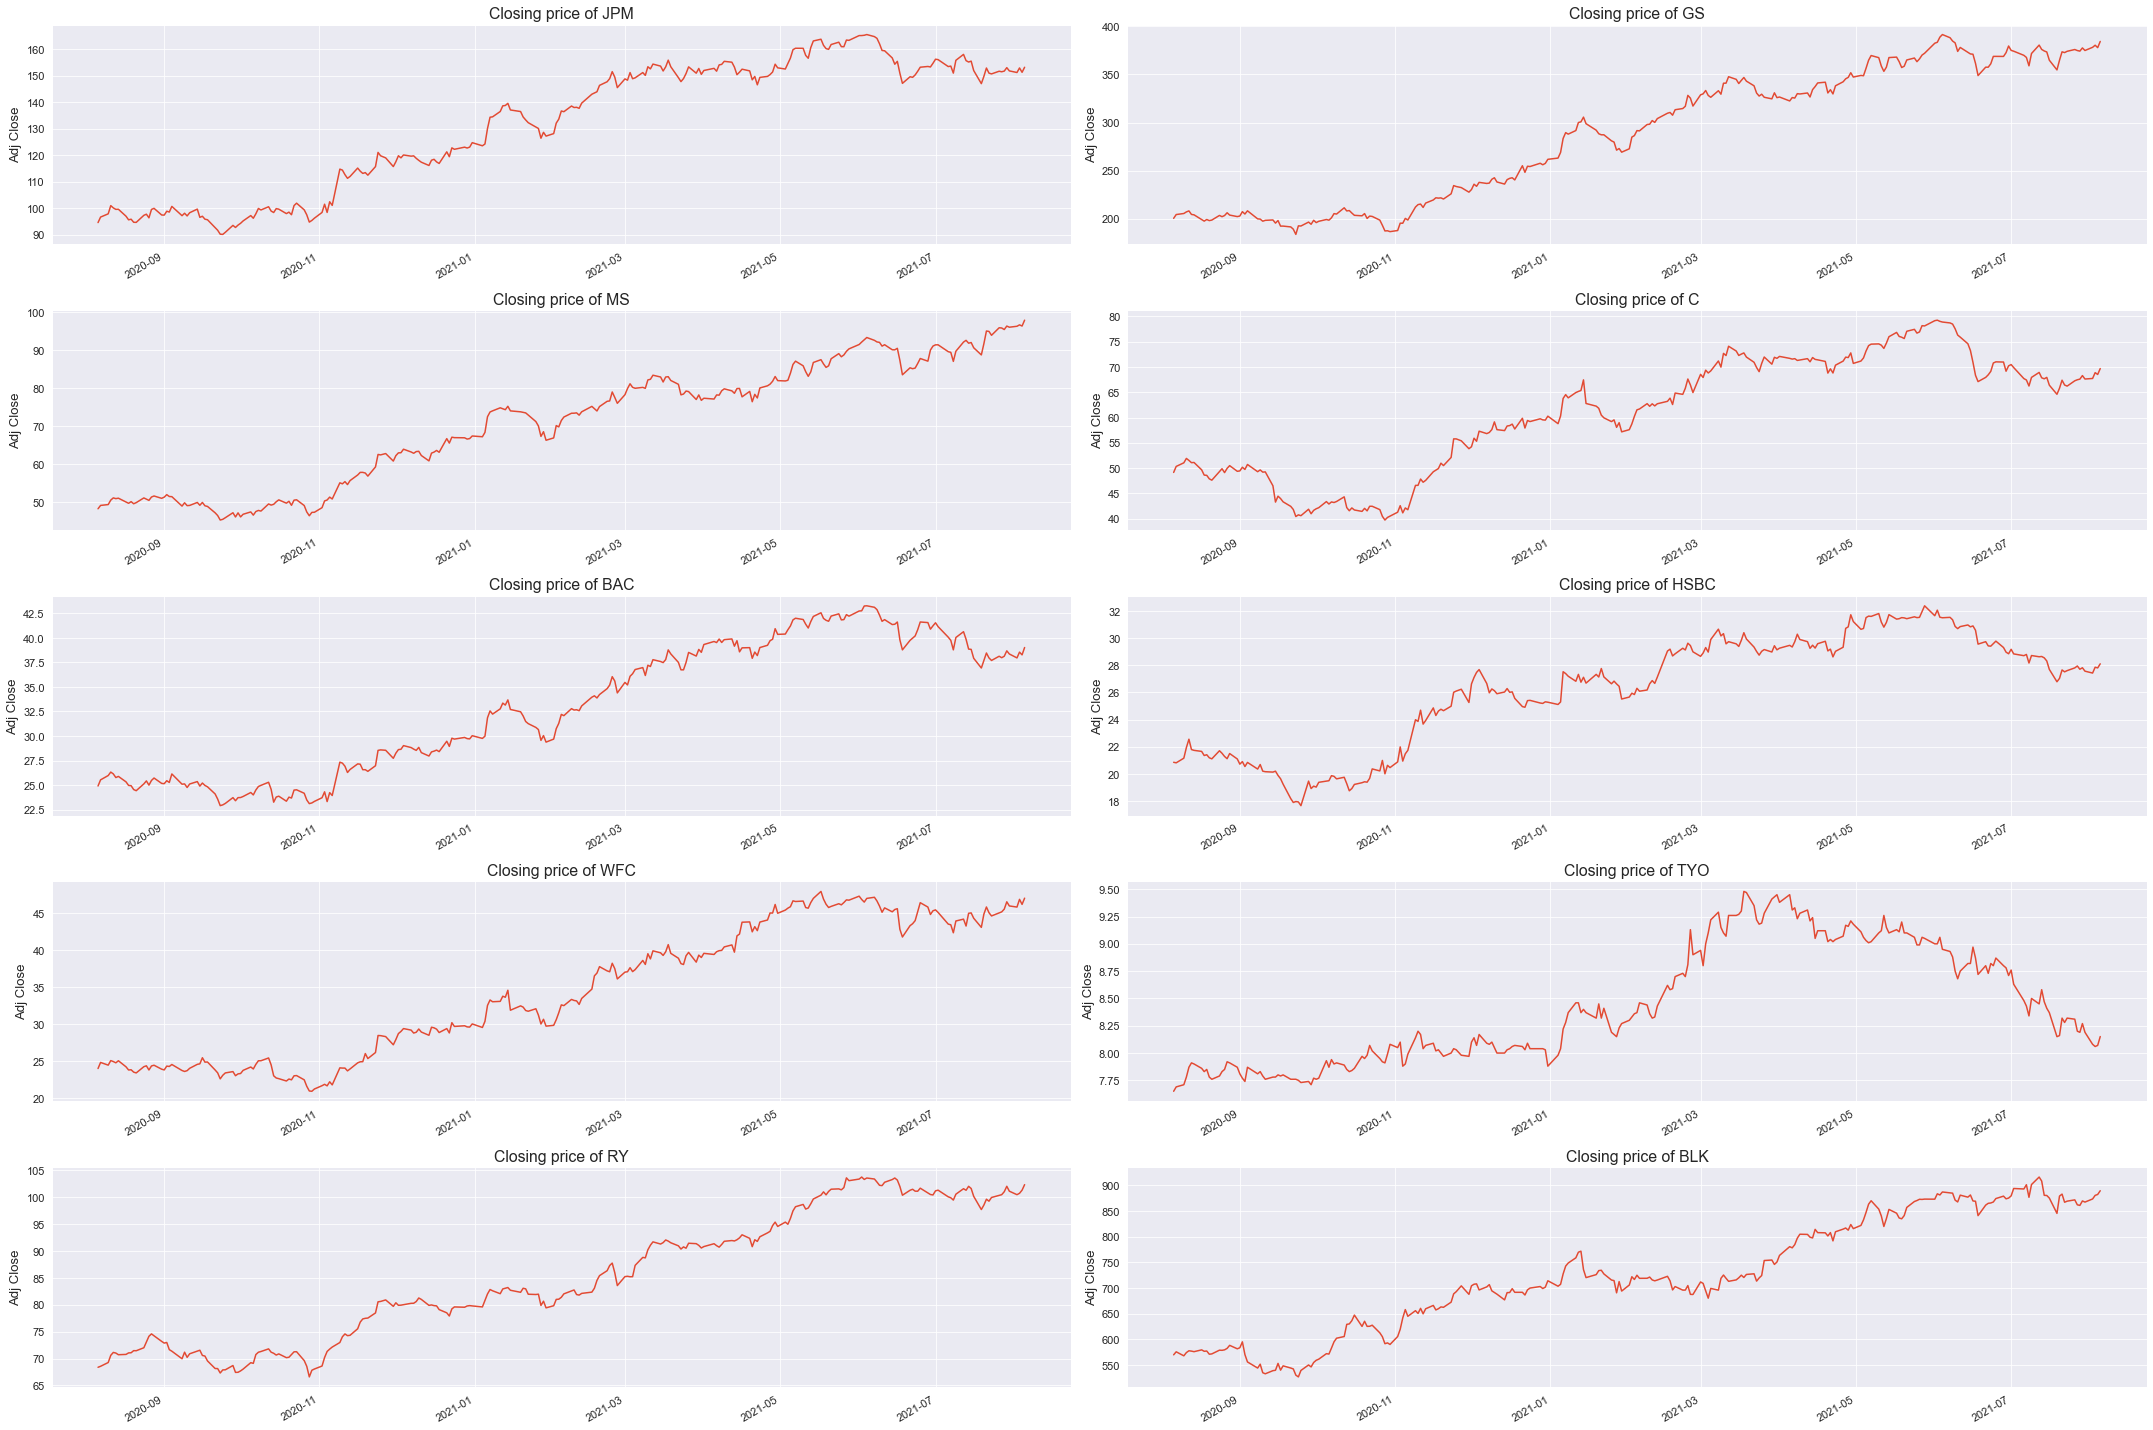

In [4]:
plt.figure(figsize=(30,20))

# in python it starts at one 
for i, stock in enumerate(stock_list, 1):
    plt.subplot(5,2,i)
    stock["Adj Close"].plot()
    plt.ylabel("Adj Close")
    plt.xlabel(None)
    plt.title(f"Closing price of {stock_name_list[i-1]}")
plt.tight_layout()

In [5]:
ma_list = [10,20,50]
for ma in ma_list:
    for stock in stock_list:
        MA = f"MA for {ma} days"
        stock[MA] = stock["Adj Close"].rolling(ma).mean()

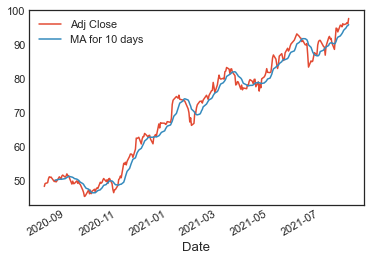

In [6]:
with plt.style.context("seaborn-white"):
    ms[["Adj Close", "MA for 10 days"]].plot()

In [7]:
plt.style.available[:]

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']